# 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

\begin{equation}
    \begin{bmatrix}
    1&2&3\\
    2&3&4
    \end{bmatrix}
    % 
    X
     \begin{bmatrix}
    3&4&5&6\\
    4&5&6&7\\
    5&6&7&8
    \end{bmatrix}
     =
     \begin{bmatrix}
     1*3+2*4+3*5&1*4+2*5+3*6&1*5+2*6+3*7&1*6+2*7+3*8\\
     2*3+3*4+4*5&2*4+3*5+4*6&2*5+3*6+4*7&2*6+3*7+4*8
     \end{bmatrix}
\end{equation}




So, the number of multiplications required to multiply (n,k) & (k,m)  matrix are =  n$*$k$*$m

the  number of additions required are = n$*$m$*$(k-1)

# 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
import random
import numpy as np
import time

In [3]:
start=time.time()
n=978
k=758
m=525

A=[[random.randint(0,100) for i in range(0,k)] for j in range(0,n)]
B=[[random.randint(0,100) for i in range(0,m)] for j in range(0,k)]
result=[[0 for i in range(0,m)] for j in range(0,n)]
for i in range(0,n):
    for j in range(0,m):
        sum=0
        for K in range(0,k):
            sum += A[i][K] * B[K][j]
        result[i][j]=sum

end=time.time()

print("\nThe execution time of list matrix multiplication is: ", (end-start)* 10**3, "ms")



The execution time of list matrix multiplication is:  142925.80437660217 ms


In [5]:
start=time.time()


result = np.matmul(A,B)




end=time.time()
print("\nThe execution time of numpy matrix multiplication is: ", (end-start)* 10**3, "ms")


The execution time of numpy matrix multiplication is:  852.0801067352295 ms


# 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [6]:

import timeit

start=time.time()
def Nmaxelements(list1, N):
    final_list = []

    for i in range(0, N):
        max1 = 0

        for j in range(len(list1)):
            if list1[j] > max1:
                max1 = list1[j]

        list1.remove(max1)
        final_list.append(max1)
        
    return final_list


    

list1 = [8,7,6,5,4,3,2,1]

x=len(list1)
if x%2!=0:
    a=Nmaxelements(list1,int(x/2)+1)
    print(a[-1])
else:
    a=Nmaxelements(list1,int(x/2)+1)
    print((a[-1]+a[-2])/2)
end=time.time()
print("\nThe execution time of matrix multiplication using numpy is: ", (end-start)* 10**3, "ms")

4.5

The execution time of matrix multiplication using numpy is:  1.5528202056884766 ms


In [7]:
import numpy as np
start = time.time()

def median():
    median = 0
    array = [23,52,68,4,15,78,96,52,20]
    array = np.sort(array,kind='merge sort')
    if length % 2 != 0:
        median = array[(length//2)]
    else:
        median = (array[((length//2)-1)] + array[(length//2)])/2
    return median
end = time.time()

print("The execution time of the finding the median : " ,(end-start)* 10**3,"ms")

The execution time of the finding the median :  0.1785755157470703 ms


In [8]:
start = time.time()
def median_np():
    l1 = [23,52,68,4,15,78,96,52,20]
    return np.median(l1)
end = time.time()

print("The execution time of finding median usinf numpy: ", (end-start)* 10**3 , "ms")

The execution time of finding median usinf numpy:  0.11157989501953125 ms


# 4. What is the gradient of the following function with respect to x and y?

![](Capture.PNG)

$\frac{\delta f}{\delta x} = 2xy+y^3cos(x)  $

$\frac{\delta f}{\delta y} = x^2+3y^2sin(x) $

$\nabla f = \frac{\delta f}{\delta x} \hat{i} + \frac{\delta f}{\delta y} \hat{j} $



$\nabla f =(2xy + y^3cos(x)) \hat{i} + (x^2 + 3y^2sin(x))\hat{j}$

# 5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [9]:
import jax
def function(a,b):
  return(a**2)*b+(a**3)*jax.numpy.sin(a)
def fun_gradient(a,b):
  ans = [2*a*b + (a**3) * jax.numpy.cos(a),a**2+3*(a**2)*jax.numpy.sin(a)]
  return jax.numpy.array(ans)
jax_gradient = jax.grad(function,(0,1))
print("fun(pi,3.0: {0}". format(function(jax.numpy.pi,3.0)))
print("gradient using explicit gradient function : {0}". format(fun_gradient(jax.numpy.pi,3.0)))
print("gradient using jax: {0}".format(jax_gradient(jax.numpy.pi,3.0)))


fun(pi,3.0: 29.608810424804688
gradient using explicit gradient function : [-12.156721   9.869601]
gradient using jax: (DeviceArray(-12.156725, dtype=float32, weak_type=True), DeviceArray(9.869605, dtype=float32, weak_type=True))


In [10]:
print("fun(pi,4.0):{0}".format(function(jax.numpy.pi,4.0)))
print("gradient using explicit gradient function: {0}". format(fun_gradient(jax.numpy.pi,4.0)))
print("gradient using jax: {0}".format(jax_gradient(jax.numpy.pi,4.0)))

fun(pi,4.0):39.47841262817383
gradient using explicit gradient function: [-5.873535  9.869601]
gradient using jax: (DeviceArray(-5.873539, dtype=float32, weak_type=True), DeviceArray(9.869605, dtype=float32, weak_type=True))


# 6. Use sympy to confirm that you obtain the same gradient analytically.

In [11]:
from sympy import *
x, y = symbols('x y')
init_printing(use_unicode=True)


In [12]:
diff( ((x**2)*y) + ((y**3)*sin(x)), x)

In [13]:
diff( ((x**2)*y) + ((y**3)*sin(x)), y)

# 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [14]:
import numpy as np
from pprint import pprint
years = ['2017','2018','2019','2020']
branches = ['CSE','IT','MECH','CE']
students = [['Gangaram','omkar','Bhaskar','Banti','Ranjith','Sanik','Harish'],
           ['Hitesh','Ayush','Anant','Shivam','Hrishi']]
roll_no = [[17,18,19,20,21,22,23],
          [101,102,103,104,105]]
marks = [99,97,89,96,91,86,74,80,90,93,99,87]

subjects = ['Telugu','English','Maths']
students_info = {}
for i in years:
    students_info[i]={}
    for j in branches:
        students_info[i][j] = {}
        for k in range(len(students)):
            for l in range(len(students[k])):
                students_info[i][j][roll_no[k][l]] = {}
                students_info[i][j][roll_no[k][l]]['Name'] = students [k][l]
                students_info[i][j][roll_no[k][l]]['Marks'] = {}
                students_info[i][j][roll_no[k][l]]['Marks'][subjects[0]] = np.random.choice(marks)
                students_info[i][j][roll_no[k][l]]['Marks'][subjects[1]] = np.random.choice(marks)
                students_info[i][j][roll_no[k][l]]['Marks'][subjects[2]] = np.random.choice(marks)
                
pprint(students_info)            

{'2017': {'CE': {17: {'Marks': {'English': 99, 'Maths': 86, 'Telugu': 99},
                      'Name': 'Gangaram'},
                 18: {'Marks': {'English': 87, 'Maths': 97, 'Telugu': 99},
                      'Name': 'omkar'},
                 19: {'Marks': {'English': 74, 'Maths': 99, 'Telugu': 86},
                      'Name': 'Bhaskar'},
                 20: {'Marks': {'English': 74, 'Maths': 87, 'Telugu': 80},
                      'Name': 'Banti'},
                 21: {'Marks': {'English': 86, 'Maths': 99, 'Telugu': 86},
                      'Name': 'Ranjith'},
                 22: {'Marks': {'English': 96, 'Maths': 89, 'Telugu': 99},
                      'Name': 'Sanik'},
                 23: {'Marks': {'English': 89, 'Maths': 97, 'Telugu': 99},
                      'Name': 'Harish'},
                 101: {'Marks': {'English': 74, 'Maths': 91, 'Telugu': 89},
                       'Name': 'Hitesh'},
                 102: {'Marks': {'English': 96, 'Maths': 99, 'Telugu'

# 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [15]:
class student:
    
    def __init__(self,name,rollno,marks):
        self.name = name
        self.rollno=rollno
        self.marks=marks
        
class branch:
    def __init__(self,name):
        self.name = name
        self.stulist = []
    def add_student(self,stu):
        self.stulist.append(stu)

class year:
    def __init__(self,name):
        self.name = name
        self.branchlist=[]
        
    def add_branches(self,brnch):
        self.branchlist.append(brnch)
        
class database:
    def __init__(self,name):
        self.name = name
        self.yearlist = []
        
    def add_year(self,yr):
        self.yearlist.append(yr)

s1 = student('Gangaram', '17',{'English':90,'Maths':90})
s2 = student('omkar','18',{'English':89,'Maths':93})
s3 = student('Sanik','21',{'English':96,'Maths':89})
s4 = student('Ranjith','25',{'English':85,'Maths':91})
s5 = student('Bhaskar','27',{'English':88,'Maths':90})
s6 = student('banti','20',{'English':95,'Maths':81})
s7 = student('Raju','23',{'English':80,'Maths':91})
s8 = student('Ramu','20',{'English':95,'Maths':91})

b1=branch('CSE')
b2=branch('IT')
b3=branch('MECH')
b4=branch("CE")

b1.add_student(s1)
b1.add_student(s2)

b2.add_student(s3)
b2.add_student(s4)

b3.add_student(s6)
b3.add_student(s5)

b4.add_student(s7)
b4.add_student(s8)



yr1 = year('2017')
yr2 = year('2020')
yr3 = year('2018')
yr4=year('2019')

yr1.add_branches(b1)
yr2.add_branches(b2)
yr3.add_branches(b3)
yr4.add_branches(b4)

db=database('IITGN')
db.add_year(yr1)
db.add_year(yr2)
db.add_year(yr3)
db.add_year(yr4)

print(db.name)
for i in db.yearlist:
    print(" "*4,i.name)
    for j in i.branchlist:
        print(" "*8,j.name)
        for k in j.stulist:
            print(" "*12,k.name,k.rollno,k.marks)

IITGN
     2017
         CSE
             Gangaram 17 {'English': 90, 'Maths': 90}
             omkar 18 {'English': 89, 'Maths': 93}
     2020
         IT
             Sanik 21 {'English': 96, 'Maths': 89}
             Ranjith 25 {'English': 85, 'Maths': 91}
     2018
         MECH
             banti 20 {'English': 95, 'Maths': 81}
             Bhaskar 27 {'English': 88, 'Maths': 90}
     2019
         CE
             Raju 23 {'English': 80, 'Maths': 91}
             Ramu 20 {'English': 95, 'Maths': 91}


# 9.Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5

![](Capture_1.PNG)

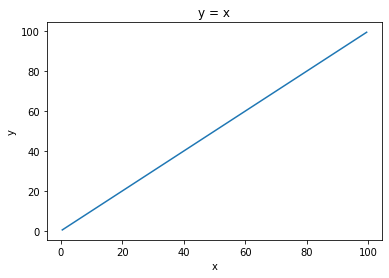

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.0, 0.5)

y = x


plt.plot(x, y)


plt.title("y = x")
plt.xlabel("x")
plt.ylabel("y")


plt.show()


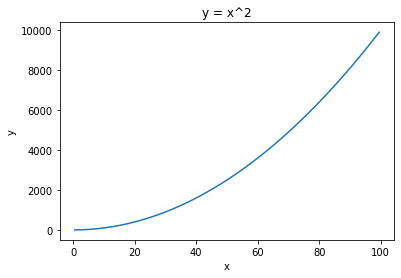

In [17]:
y = x**2


plt.plot(x, y)


plt.title("y = x^2")
plt.xlabel("x")
plt.ylabel("y")


plt.show()


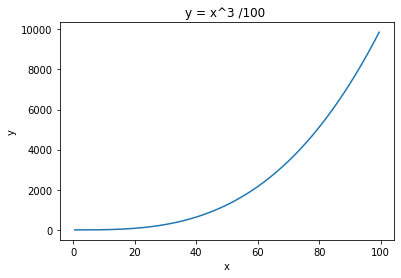

In [18]:
y = (x**3)/100


plt.plot(x, y)


plt.title("y = x^3 /100 ")
plt.xlabel("x")
plt.ylabel("y")


plt.show()


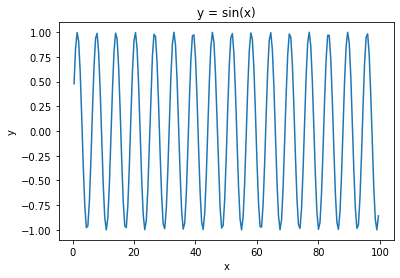

In [19]:
y = np.sin(x)


plt.plot(x, y)


plt.title("y = sin(x)")
plt.xlabel("x")
plt.ylabel("y")


plt.show()

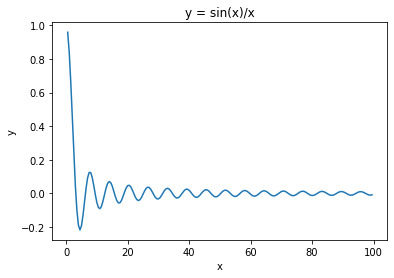

In [20]:
y = np.where(x == 0, 0, np.sin(x) / x)
plt.plot(x, y)


plt.title("y = sin(x)/x")
plt.xlabel("x")
plt.ylabel("y")


plt.show()

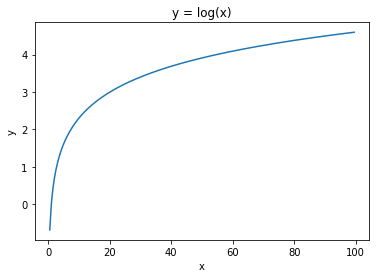

In [21]:
y = np.log(x)


plt.plot(x, y)


plt.title("y = log(x)")
plt.xlabel("x")
plt.ylabel("y")


plt.show()

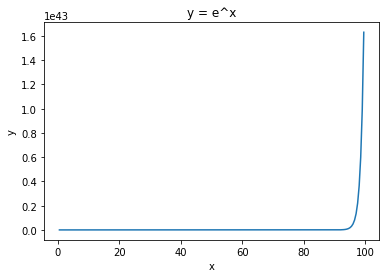

In [22]:
y = np.exp(x)


plt.plot(x, y)


plt.title("y = e^x")
plt.xlabel("x")
plt.ylabel("y")


plt.show()

# 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [23]:
import numpy as np
import pandas as pd

mat = np.random.rand(20, 5)
mat = 1 + mat
 
df = pd.DataFrame(mat, columns = ['a','b','c', 'd', 'e'])

z = pd.DataFrame(df.std())
z["Column"] = z.index
print("The Column with the Highest Standard Deviation is -> " + z.loc[z[0].idxmax()]["Column"])

df['mean'] = df.mean(axis=1)
df['index'] = df.index
print("The Row with the Lowest Mean is -> " + str(df.loc[df["mean"].idxmin()]["index"]))

The Column with the Highest Standard Deviation is -> a
The Row with the Lowest Mean is -> 11.0


# 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [24]:
df = df[['a','b','c', 'd', 'e']]
df['f'] = df.sum(axis=1)
df['g'] = df['f'].apply(lambda x: ("LT8" if x < 8 else "GT8"))
df

<ipython-input-24-9bb324199fb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['f'] = df.sum(axis=1)


,a,b,c,d,e,f,g
0,1.063519,1.821755,1.015592,1.434895,1.372075,6.707835,LT8
1,1.089271,1.655729,1.381962,1.320963,1.418282,6.866207,LT8
2,1.159112,1.045167,1.854682,1.706683,1.381907,7.147551,LT8
3,1.299721,1.736043,1.587643,1.252389,1.437409,7.313203,LT8
4,1.813604,1.028213,1.603289,1.359544,1.321914,7.126565,LT8
5,1.739914,1.443744,1.125645,1.036796,1.301000,6.647099,LT8
6,1.259236,1.436014,1.723795,1.937954,1.363847,7.720846,LT8
7,1.979251,1.793507,1.211551,1.617277,1.089997,7.691582,LT8
8,1.695132,1.922532,1.752869,1.905448,1.759037,9.035018,GT8
9,1.190877,1.232198,1.522764,1.603366,1.857627,7.406831,LT8


# 12. Write a small piece of code to explain broadcasting in numpy.

In [25]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

In [26]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
a * b

array([2., 4., 6.])

# 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [27]:
import numpy as np
array = np.random.randint(1,100, size=(4,4))
def fun(array):
  x = list(array.flatten())
  print(x.index(min(x)))
print(array)
fun(array)

print(np.argmin(array))

[[64 35 60 37]
 [61 47 28 65]
 [21 54 34 76]
 [21 33 64 76]]
8
8
